# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [ ]:
## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['georgetown', 'punta arenas', 'cabo san lucas', 'mahebourg', 'am timan', 'bambous virieux', 'new norfolk', 'mataura', 'bakhtiyarpur', 'honningsvag', 'nizhneyansk', 'port lincoln', 'jamestown', 'souillac', 'saint-philippe', 'thompson', 'atuona', 'santa rosa', 'krasnorechenskiy', 'chokurdakh', 'ribeira grande', 'verkhnevilyuysk', 'palmas bellas', 'rikitea', 'albany', 'sentyabrskiy', 'norman wells', 'tasiilaq', 'butaritari', 'port elizabeth', 'vostok', 'vila franca do campo', 'marrakesh', 'airai', 'koboldo', 'tiarei', 'te anau', 'kollam', 'kaitangata', 'belushya guba', 'bluff', 'ushuaia', 'guerrero negro', 'demyansk', 'grand river south east', 'port alfred', 'vaini', 'qaanaaq', 'bethel', 'micheweni', 'torbay', 'besao', 'atar', 'illoqqortoormiut', 'kalmunai', 'banda aceh', 'vrangel', 'inta', 'sao filipe', 'holme', 'sao joao da barra', 'yellowknife', 'puerto ayora', 'grindavik', 'san miguel', 'kodiak', 'san patricio', 'busselton', 'taolanaro', 'komsomolskiy', 'kaeo', 'dunedin', 'lyuban', '

In [72]:
### Perform API Calls
# * Perform a weather check on each city using a series of successive API calls.
# * Include a print log of each city as it'sbeing processed (with the city number and city name).
url = "api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"http://{url}appid={weather_api_key}&units={units}&q="
print(query_url)

# set up lists to hold reponse info
lat = []
lng = []
temp = []
humi = []
wind = []
cloud = []
valid_cities = []
countries = []
datetime = []

print("Beginning Data Retrieval")     
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for i in range(len(cities)):
    try:
        print(f"Processing Record {i} of Set {len(cities)} | {cities[i]}")
        response = requests.get(query_url + cities[i]).json()
        #pprint(response)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humi.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        valid_cities.append(cities[i])
        countries.append(response['sys']['country'])
        datetime.append(response['dt'])
    except:
        print("### City not found. Skipping...")
    
print("-----------------------------")
print("End of Data Retrieval") 
print("-----------------------------")

print(f"The latitude information received is: {len(lat)} {lat}")
print(f"The latitude information received is: {len(lng)} {lng}")
print(f"The temperature information received is: {len(temp)} {temp}")
print(f"The humidity information received is: {len(humi)} {humi}")
print(f"The wind information received is: {len(wind)} {wind}")
print(f"The cloud information received is: {len(cloud)} {cloud}")

de information received is: 562 [5.41, -53.15, 22.89, -20.41, 11.03, -20.34, -42.78, -46.19, 25.47, 70.98, -34.73, 42.1, -20.52, -21.36, 55.74, -9.8, 14.31, 44.63, 70.63, 38.52, 63.45, 9.23, -23.12, 42.6, 65.28, 65.61, 3.07, -33.92, 46.49, 37.72, 31.63, -8.93, -17.53, -45.42, 8.88, -46.28, -46.6, -54.8, 27.98, 57.64, -33.59, -21.2, 77.48, 41.37, -4.97, 47.67, 17.09, 20.52, 7.42, 5.56, 42.73, 66.03, 14.9, 56.11, -21.64, 62.46, -0.74, 63.84, 13.48, 57.79, 19.22, -33.65, 40.43, -35.1, -45.87, 52.8, 51.86, 50.68, -7.51, 69.45, 57.56, -6.64, 60.14, 19.73, 19.37, 71, -43.3, 53.05, 7.71, -3.8, 60.73, -20.32, 51.8, -35.17, 69.38, 36.4, -0.95, -40.81, 65.75, 63.44, -17.53, 22.67, 19.45, -22.45, 22.29, 38.89, 36.21, 53.56, -2.57, 50.23, 48.8, -34, 34.64, -26.37, 71.29, 38.42, -37.62, 51.46, 51.1, 64.5, -24.79, 39.77, -18.06, 59.7, 44.71, 12.98, 71.04, 41.87, 34, -8.43, 62.23, -38.55, 5.14, -42.88, 46.47, 36.52, 65.85, -2.54, -33.93, 22.08, 78.22, -33.3, 35.13, -13.7, 34.17, -27.8, -12.79, -27.16

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [73]:
city_df = pd.DataFrame({'City':valid_cities,
                        'Lat':lat,
                        'Lng':lng,
                        'Max Temp':temp,
                        'Humidity':humi,
                        'Cloudiness':cloud,
                        'Wind Speed':wind,
                        'Country':countries,
                        'Date':pd.to_datetime(datetime, unit='s')})
city_df.sort_values(['Humidity'], ascending=False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
95,mayo,38.89,-76.51,64.49,100,1,4.70,US,2020-05-15 04:50:23
232,vrnjacka banja,43.62,20.90,55.40,100,85,1.12,RS,2020-05-15 04:50:59
143,indianola,41.36,-93.56,60.66,100,75,3.36,US,2020-05-15 04:50:35
209,caibarien,22.52,-79.47,73.40,100,75,5.82,CU,2020-05-15 04:50:54
414,manacapuru,-3.30,-60.62,75.20,100,69,1.12,BR,2020-05-15 04:51:50
...,...,...,...,...,...,...,...,...,...
364,heihe,50.24,127.49,69.80,13,40,8.95,CN,2020-05-15 04:51:36
224,moussoro,13.64,16.49,87.26,12,50,8.12,TD,2020-05-15 04:50:57
158,vashkivtsi,48.38,25.51,39.00,10,100,5.48,UA,2020-05-15 04:50:40
63,kaeo,-35.10,173.78,62.49,10,76,1.01,NZ,2020-05-15 04:50:15


In [74]:
city_df[city_df.Humidity > 100].sort_values(['Humidity'], ascending=False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
## Inspect the data and remove the cities where the humidity > 100%.
# ----
# Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [75]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
city_df.to_csv("City_Data.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

R squared: 0.1619359069449486
The correlation between both factors is -0.4


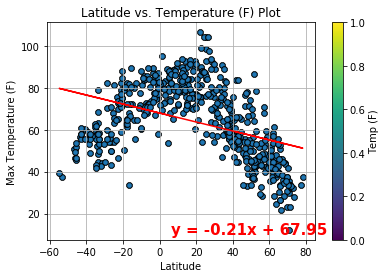

In [76]:
## Convert to floats and store latitude and temperature as x and y values
x_values = city_df['Lat'].astype('float')
y_values = city_df['Max Temp'].astype('float')
#y_values = city_df['Lng'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,marker="8",edgecolors="black") #,c=city_df['Max Temp'])

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red",weight="extra bold")

# Label plot
plt.title("Latitude vs. Temperature (F) Plot")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
clb = plt.colorbar()
clb.set_label("Temp (F)")

# Print r square value & correlation 
print(f"R squared: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Save the figure
plt.savefig("Lat-vs-Temp.png")
# Show plot
plt.show()

## Latitude vs. Humidity Plot

R squared: 0.0027770652012910164
The correlation between both factors is -0.05


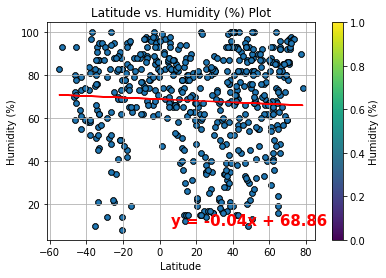

In [77]:
## Convert to floats and store latitude and Humidity as x and y values
x_values = city_df['Lat'].astype('float')
y_values = city_df['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,marker="8",edgecolors="black") #,c=city_df['Humidity'])

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red",weight="extra bold")

# Label plot
plt.title("Latitude vs. Humidity (%) Plot")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
clb = plt.colorbar()
clb.set_label("Humidity (%)")

# Print r square value & correlation 
print(f"R squared: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Save the figure
plt.savefig("Lat-vs-Humi.png")
# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

R squared: 0.030354046151960332
The correlation between both factors is 0.17


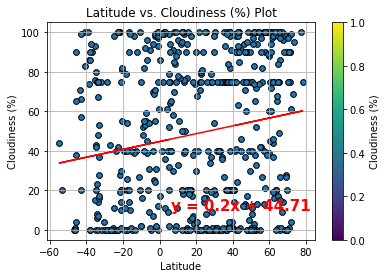

In [78]:
## Convert to floats and store latitude and Cloudiness as x and y values
x_values = city_df['Lat'].astype('float')
y_values = city_df['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,marker="8",edgecolors="black") #,c=city_df['Cloudiness'])

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red",weight="extra bold")

# Label plot
plt.title("Latitude vs. Cloudiness (%) Plot")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
clb = plt.colorbar()
clb.set_label("Cloudiness (%)")

# Print r square value & correlation 
print(f"R squared: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Save the figure
plt.savefig("Lat-vs-Cloud.png")
# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

R squared: 0.025763097038527555
The correlation between both factors is 0.16


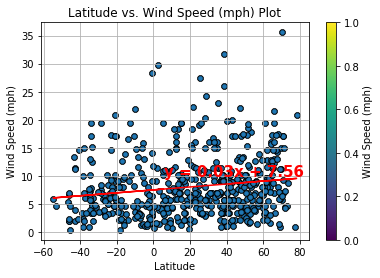

In [79]:
## Convert to floats and store latitude and Wind Speed as x and y values
x_values = city_df['Lat'].astype('float')
y_values = city_df['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,marker="8",edgecolors="black") #,c=city_df['Wind Speed'])

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red",weight="extra bold")

# Label plot
plt.title("Latitude vs. Wind Speed (mph) Plot")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
clb = plt.colorbar()
clb.set_label("Wind Speed (mph)")

# Print r square value & correlation 
print(f"R squared: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Save the figure
plt.savefig("Lat-vs-Wind.png")
# Show plot
plt.show()

## Linear Regression

In [80]:
# OPTIONAL: Create a function to create Linear Regression plots
def plotLinearRegress(input_df,direction,x,y):
    # split df into 'North' or 'South' according to input direction
    if direction == "North":
        df = input_df[input_df.Lat >= 0]
    else:
        df = input_df[input_df.Lat < 0]

    ## Convert to floats and store x and y values
    x_values = df[x].astype('float')
    y_values = df[y].astype('float')

    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values,y_values,marker="8",edgecolors="black")

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red",weight="extra bold")

    # Label plot
    plt.title(f"{x} vs. {y} Plot")
    plt.xlabel(f"{x}")
    plt.ylabel(f"{y}")
    plt.grid(True)
    clb = plt.colorbar()
    clb.set_label(y)

    # Print r square value & correlation 
    print(f"R squared: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    # Save the figure
    plt.savefig(f"{x}-vs-{y}-regress-{direction}.png")
    # Show plot
    plt.show()

    return df


In [81]:
# Create Northern and Southern Hemisphere DataFrames
north_df = city_df[city_df.Lat >= 0]
south_df = city_df[city_df.Lat < 0]
print(north_df.Lat.head(5))
print(south_df.Lat.head(5))

0     5.41
2    22.89
4    11.03
8    25.47
9    70.98
Name: Lat, dtype: float64
1   -53.15
3   -20.41
5   -20.34
6   -42.78
7   -46.19
Name: Lat, dtype: float64


R squared: 0.6813250764366294
The correlation between both factors is -0.83


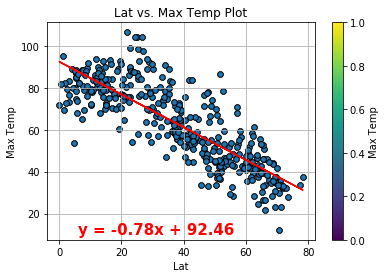

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.41,100.34,88.25,74,20,10.29,MY,2020-05-15 04:48:15
2,cabo san lucas,22.89,-109.91,75.40,44,0,16.11,MX,2020-05-15 04:45:14
4,am timan,11.03,20.28,83.53,39,95,7.09,TD,2020-05-15 04:49:58
8,bakhtiyarpur,25.47,85.52,84.20,83,20,3.36,IN,2020-05-15 04:49:59
9,honningsvag,70.98,25.97,35.60,96,75,6.93,NO,2020-05-15 04:50:00
...,...,...,...,...,...,...,...,...,...
556,lata,40.16,-8.33,52.30,100,20,1.12,PT,2020-05-15 04:52:33
557,penzance,50.12,-5.54,44.94,87,0,10.29,GB,2020-05-15 04:52:33
558,tecoanapa,16.52,-98.75,79.59,70,0,2.26,MX,2020-05-15 04:52:34
560,kazachinskoye,57.70,93.28,55.31,42,100,5.75,RU,2020-05-15 04:52:34


In [82]:
####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plotLinearRegress(city_df,'North','Lat','Max Temp')

R squared: 0.5180430643526227
The correlation between both factors is 0.72


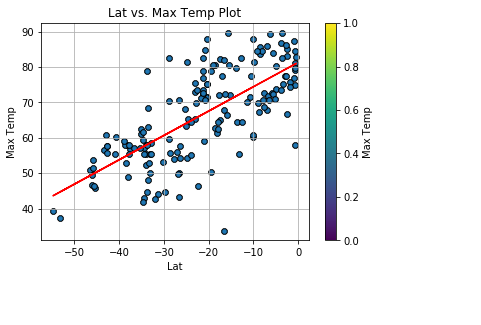

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,punta arenas,-53.15,-70.92,37.20,93,20,4.70,CL,2020-05-15 04:49:58
3,mahebourg,-20.41,57.70,71.60,83,20,5.82,MU,2020-05-15 04:49:58
5,bambous virieux,-20.34,57.76,75.13,83,20,5.82,MU,2020-05-15 04:49:59
6,new norfolk,-42.78,147.06,57.81,79,57,4.00,AU,2020-05-15 04:49:59
7,mataura,-46.19,168.86,46.65,80,0,2.08,NZ,2020-05-15 04:49:59
...,...,...,...,...,...,...,...,...,...
532,presidencia roque saenz pena,-26.79,-60.44,49.86,63,0,3.89,AR,2020-05-15 04:52:25
536,namatanai,-3.67,152.43,82.65,79,94,5.10,PG,2020-05-15 04:52:27
543,saint-joseph,-21.37,55.62,72.68,50,19,4.70,RE,2020-05-15 04:52:29
549,pando,-34.72,-55.95,41.95,87,42,5.82,UY,2020-05-15 04:47:43


In [83]:
####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression
plotLinearRegress(city_df,'South','Lat','Max Temp')

R squared: 0.008721240579404316
The correlation between both factors is 0.09


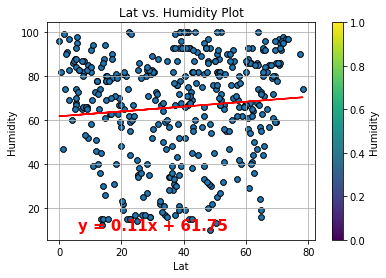

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.41,100.34,88.25,74,20,10.29,MY,2020-05-15 04:48:15
2,cabo san lucas,22.89,-109.91,75.40,44,0,16.11,MX,2020-05-15 04:45:14
4,am timan,11.03,20.28,83.53,39,95,7.09,TD,2020-05-15 04:49:58
8,bakhtiyarpur,25.47,85.52,84.20,83,20,3.36,IN,2020-05-15 04:49:59
9,honningsvag,70.98,25.97,35.60,96,75,6.93,NO,2020-05-15 04:50:00
...,...,...,...,...,...,...,...,...,...
556,lata,40.16,-8.33,52.30,100,20,1.12,PT,2020-05-15 04:52:33
557,penzance,50.12,-5.54,44.94,87,0,10.29,GB,2020-05-15 04:52:33
558,tecoanapa,16.52,-98.75,79.59,70,0,2.26,MX,2020-05-15 04:52:34
560,kazachinskoye,57.70,93.28,55.31,42,100,5.75,RU,2020-05-15 04:52:34


In [84]:
####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plotLinearRegress(city_df,'North','Lat','Humidity')

R squared: 0.04891375749699243
The correlation between both factors is 0.22


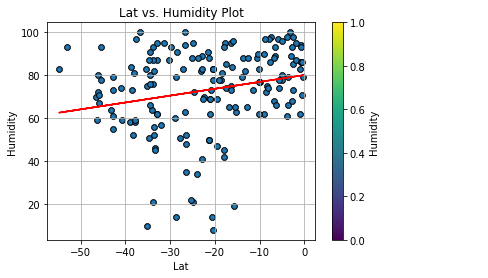

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,punta arenas,-53.15,-70.92,37.20,93,20,4.70,CL,2020-05-15 04:49:58
3,mahebourg,-20.41,57.70,71.60,83,20,5.82,MU,2020-05-15 04:49:58
5,bambous virieux,-20.34,57.76,75.13,83,20,5.82,MU,2020-05-15 04:49:59
6,new norfolk,-42.78,147.06,57.81,79,57,4.00,AU,2020-05-15 04:49:59
7,mataura,-46.19,168.86,46.65,80,0,2.08,NZ,2020-05-15 04:49:59
...,...,...,...,...,...,...,...,...,...
532,presidencia roque saenz pena,-26.79,-60.44,49.86,63,0,3.89,AR,2020-05-15 04:52:25
536,namatanai,-3.67,152.43,82.65,79,94,5.10,PG,2020-05-15 04:52:27
543,saint-joseph,-21.37,55.62,72.68,50,19,4.70,RE,2020-05-15 04:52:29
549,pando,-34.72,-55.95,41.95,87,42,5.82,UY,2020-05-15 04:47:43


In [85]:
####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plotLinearRegress(city_df,'South','Lat','Humidity')

R squared: 0.015508746677614479
The correlation between both factors is 0.12


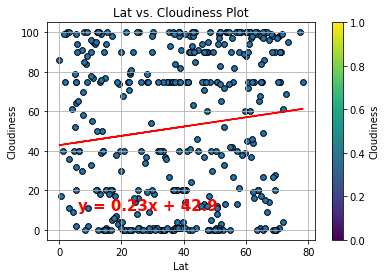

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.41,100.34,88.25,74,20,10.29,MY,2020-05-15 04:48:15
2,cabo san lucas,22.89,-109.91,75.40,44,0,16.11,MX,2020-05-15 04:45:14
4,am timan,11.03,20.28,83.53,39,95,7.09,TD,2020-05-15 04:49:58
8,bakhtiyarpur,25.47,85.52,84.20,83,20,3.36,IN,2020-05-15 04:49:59
9,honningsvag,70.98,25.97,35.60,96,75,6.93,NO,2020-05-15 04:50:00
...,...,...,...,...,...,...,...,...,...
556,lata,40.16,-8.33,52.30,100,20,1.12,PT,2020-05-15 04:52:33
557,penzance,50.12,-5.54,44.94,87,0,10.29,GB,2020-05-15 04:52:33
558,tecoanapa,16.52,-98.75,79.59,70,0,2.26,MX,2020-05-15 04:52:34
560,kazachinskoye,57.70,93.28,55.31,42,100,5.75,RU,2020-05-15 04:52:34


In [86]:
####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plotLinearRegress(city_df,'North','Lat','Cloudiness')

R squared: 0.015405919033466092
The correlation between both factors is 0.12


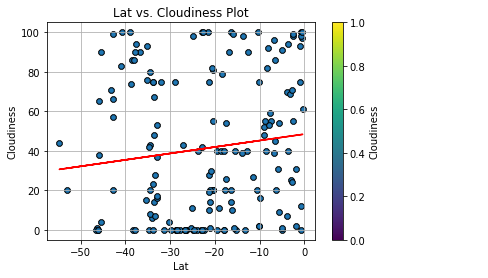

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,punta arenas,-53.15,-70.92,37.20,93,20,4.70,CL,2020-05-15 04:49:58
3,mahebourg,-20.41,57.70,71.60,83,20,5.82,MU,2020-05-15 04:49:58
5,bambous virieux,-20.34,57.76,75.13,83,20,5.82,MU,2020-05-15 04:49:59
6,new norfolk,-42.78,147.06,57.81,79,57,4.00,AU,2020-05-15 04:49:59
7,mataura,-46.19,168.86,46.65,80,0,2.08,NZ,2020-05-15 04:49:59
...,...,...,...,...,...,...,...,...,...
532,presidencia roque saenz pena,-26.79,-60.44,49.86,63,0,3.89,AR,2020-05-15 04:52:25
536,namatanai,-3.67,152.43,82.65,79,94,5.10,PG,2020-05-15 04:52:27
543,saint-joseph,-21.37,55.62,72.68,50,19,4.70,RE,2020-05-15 04:52:29
549,pando,-34.72,-55.95,41.95,87,42,5.82,UY,2020-05-15 04:47:43


In [87]:
####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plotLinearRegress(city_df,'South','Lat','Cloudiness')

R squared: 0.013915742686293187
The correlation between both factors is 0.12


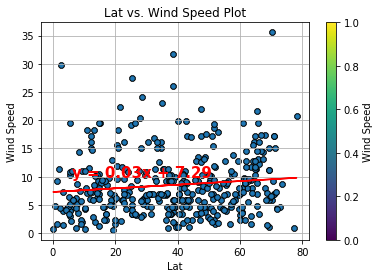

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.41,100.34,88.25,74,20,10.29,MY,2020-05-15 04:48:15
2,cabo san lucas,22.89,-109.91,75.40,44,0,16.11,MX,2020-05-15 04:45:14
4,am timan,11.03,20.28,83.53,39,95,7.09,TD,2020-05-15 04:49:58
8,bakhtiyarpur,25.47,85.52,84.20,83,20,3.36,IN,2020-05-15 04:49:59
9,honningsvag,70.98,25.97,35.60,96,75,6.93,NO,2020-05-15 04:50:00
...,...,...,...,...,...,...,...,...,...
556,lata,40.16,-8.33,52.30,100,20,1.12,PT,2020-05-15 04:52:33
557,penzance,50.12,-5.54,44.94,87,0,10.29,GB,2020-05-15 04:52:33
558,tecoanapa,16.52,-98.75,79.59,70,0,2.26,MX,2020-05-15 04:52:34
560,kazachinskoye,57.70,93.28,55.31,42,100,5.75,RU,2020-05-15 04:52:34


In [88]:
####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plotLinearRegress(city_df,'North','Lat','Wind Speed')

R squared: 0.003433049190850241
The correlation between both factors is 0.06


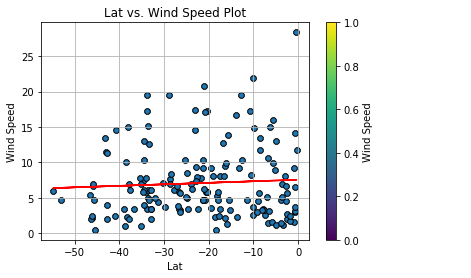

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,punta arenas,-53.15,-70.92,37.20,93,20,4.70,CL,2020-05-15 04:49:58
3,mahebourg,-20.41,57.70,71.60,83,20,5.82,MU,2020-05-15 04:49:58
5,bambous virieux,-20.34,57.76,75.13,83,20,5.82,MU,2020-05-15 04:49:59
6,new norfolk,-42.78,147.06,57.81,79,57,4.00,AU,2020-05-15 04:49:59
7,mataura,-46.19,168.86,46.65,80,0,2.08,NZ,2020-05-15 04:49:59
...,...,...,...,...,...,...,...,...,...
532,presidencia roque saenz pena,-26.79,-60.44,49.86,63,0,3.89,AR,2020-05-15 04:52:25
536,namatanai,-3.67,152.43,82.65,79,94,5.10,PG,2020-05-15 04:52:27
543,saint-joseph,-21.37,55.62,72.68,50,19,4.70,RE,2020-05-15 04:52:29
549,pando,-34.72,-55.95,41.95,87,42,5.82,UY,2020-05-15 04:47:43


In [89]:
####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plotLinearRegress(city_df,'South','Lat','Wind Speed')